In [11]:
import AutoOD as aod
import numpy as np
import CLAMS as clams
from tqdm import tqdm
import json
import matplotlib.pyplot as plt



26569


In [7]:
contamination_arr = np.linspace(0.05, 0.5, 20)
identifier = "npz"


data_name = "clothes"


lof_nn_results = {
	10: [],
	20: [],
	30: [],
	40: [],
	50: []
}

zipfile = np.load(f"./data_sampling/{data_name}.{identifier}", allow_pickle=True)
data, labels = zipfile["positions"], zipfile["labels"]

for contamination in contamination_arr:
	print("running contamination", contamination)
	for nn in tqdm(lof_nn_results.keys()):
		prediction = aod.local_outlier_factor(data, nn, contamination)
		data_wo_outliers = data[prediction == 1]
		ca = clams.ClusterAmbiguity(verbose=0, S=3)
		amb_score = ca.fit(data_wo_outliers)
		lof_nn_results[nn].append(amb_score)


running contamination 0.05


100%|██████████| 5/5 [02:52<00:00, 34.48s/it]


running contamination 0.1


100%|██████████| 5/5 [02:22<00:00, 28.51s/it]


running contamination 0.15000000000000002


100%|██████████| 5/5 [02:18<00:00, 27.71s/it]


running contamination 0.2


100%|██████████| 5/5 [02:31<00:00, 30.40s/it]


running contamination 0.25


100%|██████████| 5/5 [02:01<00:00, 24.22s/it]


running contamination 0.3


100%|██████████| 5/5 [01:45<00:00, 21.07s/it]


running contamination 0.35000000000000003


100%|██████████| 5/5 [01:36<00:00, 19.32s/it]


running contamination 0.4


100%|██████████| 5/5 [01:22<00:00, 16.47s/it]


running contamination 0.45


100%|██████████| 5/5 [01:48<00:00, 21.65s/it]


running contamination 0.5


100%|██████████| 5/5 [01:48<00:00, 21.69s/it]


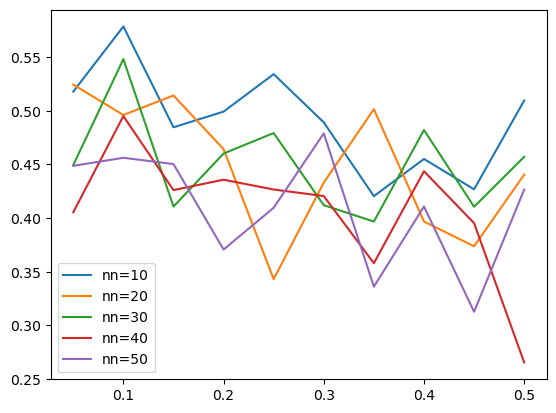

In [13]:
results = {
	"results": lof_nn_results,
	"contamination": contamination_arr.tolist()
}

with open(f"./od_benchmark/results/lof_nn_{data_name}.json", "w") as f:
	json.dump(results, f)

## plot the results
for key in lof_nn_results.keys():
	plt.plot(contamination_arr, lof_nn_results[key], label=f"nn={key}")

plt.legend()